
*   Tito Etimiri - 19248547

*   Mary Tease - 19256434

*   Padraic Foley - 19232845



THe code executes to the end without issue. We are using a flow form directory as the data is stored in a folder on google Drives - link to said Drive: https://drive.google.com/drive/folders/1reaijt1ybfeQdw0LO71p578gLMl0puxU?usp=share_link 


The file path must be update to how it is stored on your own drive after moving it from shared with me to your own drive.

# **Sources**


https://stackoverflow.com/questions/64743579/how-to-display-multiple-images-from-a-folder-in-python


https://medium.com/analytics-vidhya/image-recognition-using-pre-trained-xception-model-in-5-steps-96ac858f4206


https://www.analyticsvidhya.com/blog/2021/06/image-classification-using-convolutional-neural-network-with-python/

# **Xception architecture**

# **Start off by connecting to the Google Drive, since we are using Colab, we opted to store the dataset in a Google Drive for ease of access when calling for the flow from directory.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import all the modules needed for the code**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

# **Set the train and test path and declare the epoch number and batch size**

In [ ]:
train_path = "/content/drive/MyDrive/archive (1)/train/train"
test_path = "/content/drive/MyDrive/archive (1)/test"

epochs = 7
batch_size = 64

# **Plot 9 random images from the test folder as a sample for data visualisation using the pyplot import**

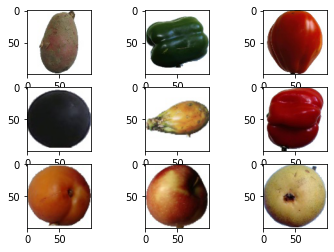

In [ ]:
import os
from matplotlib import pyplot
from matplotlib.image import imread

img_dir="/content/drive/MyDrive/archive (1)/test/test"
all_files=os.listdir(img_dir)
data_path = [os.path.join(img_dir + "/" + i) for i in all_files]
k=1
for i in data_path:
  plt.subplot(3,3,k) 
  k=k+1
  plt.imshow(imread(i))
  if k == 10:
    break

plt.show()

# **Building and Training the data**



In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.2
)

test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical', 
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    subset = 'validation',
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

Found 16855 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.
Found 5651 images belonging to 1 classes.


In [ ]:
base_model = applications.Xception(weights='imagenet', 
                              include_top=False, 
                              input_shape=(299, 299, 3))

for layer in base_model.layers[:-5]:
    layer.trainable = False

model = keras.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dense(33, activation="softmax"))

input_shape = (None, 299, 299, 3)
model.build(input_shape)
model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten_1 (Flatten)         (None, 204800)            0         
                                                                 
 dense_2 (Dense)             (None, 1024)              209716224 
                                                                 
 dense_3 (Dense)             (None, 33)                33825     
                                                                 
Total params: 230,611,529
Trainable params: 212,916,769
Non-trainable params: 17,694,760
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("xception", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model.fit(train_generator,  
                                    validation_data=validation_generator,                    
                                    epochs=epochs,
                                    steps_per_epoch=batch_size,
                                    validation_steps=20,
                                    callbacks = [checkpoint, early],
                                    verbose=1)

Epoch 1/7


 1/64 [..............................] - ETA: 32:50 - loss: 3.5054 - accuracy: 0.0312

 2/64 [..............................] - ETA: 15:51 - loss: 5.5664 - accuracy: 0.0625

 3/64 [>.............................] - ETA: 15:28 - loss: 6.2604 - accuracy: 0.0625

 4/64 [>.............................] - ETA: 15:14 - loss: 5.5737 - accuracy: 0.0703

 5/64 [=>............................] - ETA: 15:31 - loss: 5.4102 - accuracy: 0.0750

 6/64 [=>............................] - ETA: 15:08 - loss: 5.0820 - accuracy: 0.1042

 7/64 [==>...........................] - ETA: 14:47 - loss: 4.8221 - accuracy: 0.1161

 8/64 [==>...........................] - ETA: 15:06 - loss: 4.7880 - accuracy: 0.1250

 9/64 [===>..........................] - ETA: 15:02 - loss: 4.6632 - accuracy: 0.1424

10/64 [===>..........................] - ETA: 14:43 - loss: 4.4845 - accuracy: 0.1562

11/64 [====>.........................] - ETA: 14:40 - loss: 4.3488 - accuracy: 0.1733

12/64 [====>.........................] - ETA: 14:17 - loss: 4.2221 - accuracy: 0.1745

13/64 [=====>........................] - ETA: 13:54 - loss: 4.1120 - accuracy: 0.1851

14/64 [=====>........................] - ETA: 13:33 - loss: 4.0283 - accuracy: 0.1786

15/64 [======>.......................] - ETA: 13:13 - loss: 3.9748 - accuracy: 0.1750

16/64 [======>.......................] - ETA: 12:53 - loss: 3.9044 - accuracy: 0.1797

17/64 [======>.......................] - ETA: 12:33 - loss: 3.8566 - accuracy: 0.1820

18/64 [=======>......................] - ETA: 12:15 - loss: 3.7866 - accuracy: 0.1875

19/64 [=======>......................] - ETA: 11:57 - loss: 3.7324 - accuracy: 0.1842

20/64 [========>.....................] - ETA: 11:40 - loss: 3.6596 - accuracy: 0.2016

21/64 [========>.....................] - ETA: 11:22 - loss: 3.6004 - accuracy: 0.2098

22/64 [=========>....................] - ETA: 11:05 - loss: 3.5519 - accuracy: 0.2131

23/64 [=========>....................] - ETA: 10:48 - loss: 3.5122 - accuracy: 0.2174

24/64 [==========>...................] - ETA: 10:31 - loss: 3.4584 - accuracy: 0.2227

25/64 [==========>...................] - ETA: 10:14 - loss: 3.4226 - accuracy: 0.2338

26/64 [===========>..................] - ETA: 9:57 - loss: 3.3758 - accuracy: 0.2356 

27/64 [===========>..................] - ETA: 9:41 - loss: 3.3285 - accuracy: 0.2419

28/64 [============>.................] - ETA: 9:24 - loss: 3.2783 - accuracy: 0.2500

29/64 [============>.................] - ETA: 9:13 - loss: 3.2334 - accuracy: 0.2597

30/64 [=============>................] - ETA: 8:57 - loss: 3.1964 - accuracy: 0.2635

31/64 [=============>................] - ETA: 8:40 - loss: 3.1694 - accuracy: 0.2671

32/64 [==============>...............] - ETA: 8:24 - loss: 3.1351 - accuracy: 0.2695

33/64 [==============>...............] - ETA: 8:07 - loss: 3.0916 - accuracy: 0.2765

34/64 [==============>...............] - ETA: 7:51 - loss: 3.0466 - accuracy: 0.2840

35/64 [===============>..............] - ETA: 7:35 - loss: 3.0277 - accuracy: 0.2884

36/64 [===============>..............] - ETA: 7:18 - loss: 3.0019 - accuracy: 0.2934

37/64 [================>.............] - ETA: 7:02 - loss: 2.9602 - accuracy: 0.3015

38/64 [================>.............] - ETA: 6:46 - loss: 2.9320 - accuracy: 0.3059

39/64 [=================>............] - ETA: 6:30 - loss: 2.8934 - accuracy: 0.3125

40/64 [=================>............] - ETA: 6:14 - loss: 2.8628 - accuracy: 0.3164

41/64 [==================>...........] - ETA: 5:58 - loss: 2.8469 - accuracy: 0.3194

42/64 [==================>...........] - ETA: 5:42 - loss: 2.8260 - accuracy: 0.3222

43/64 [===================>..........] - ETA: 5:27 - loss: 2.8148 - accuracy: 0.3219

44/64 [===================>..........] - ETA: 5:11 - loss: 2.7928 - accuracy: 0.3246

45/64 [====================>.........] - ETA: 4:55 - loss: 2.7765 - accuracy: 0.3257

46/64 [====================>.........] - ETA: 4:39 - loss: 2.7673 - accuracy: 0.3288

47/64 [=====================>........] - ETA: 4:24 - loss: 2.7478 - accuracy: 0.3338

48/64 [=====================>........] - ETA: 4:11 - loss: 2.7603 - accuracy: 0.3327

49/64 [=====================>........] - ETA: 3:56 - loss: 2.7451 - accuracy: 0.3335

50/64 [======================>.......] - ETA: 3:40 - loss: 2.7246 - accuracy: 0.3394

51/64 [======================>.......] - ETA: 3:24 - loss: 2.7026 - accuracy: 0.3419

52/64 [=======================>......] - ETA: 3:08 - loss: 2.6813 - accuracy: 0.3431

53/64 [=======================>......] - ETA: 2:52 - loss: 2.6565 - accuracy: 0.3467

54/64 [========================>.....] - ETA: 2:37 - loss: 2.6403 - accuracy: 0.3478

55/64 [========================>.....] - ETA: 2:21 - loss: 2.6131 - accuracy: 0.3517

56/64 [=========================>....] - ETA: 2:05 - loss: 2.5902 - accuracy: 0.3566

57/64 [=========================>....] - ETA: 1:49 - loss: 2.5675 - accuracy: 0.3602

58/64 [==========================>...] - ETA: 1:33 - loss: 2.5577 - accuracy: 0.3626

59/64 [==========================>...] - ETA: 1:18 - loss: 2.5413 - accuracy: 0.3655

60/64 [===========================>..] - ETA: 1:02 - loss: 2.5456 - accuracy: 0.3630

61/64 [===========================>..] - ETA: 46s - loss: 2.5309 - accuracy: 0.3658 

62/64 [============================>.] - ETA: 31s - loss: 2.5127 - accuracy: 0.3705

63/64 [============================>.] - ETA: 15s - loss: 2.4981 - accuracy: 0.3735

64/64 [==============================] - 1262s 20s/step - loss: 2.4780 - accuracy: 0.3774 - val_loss: 3.7051 - val_accuracy: 0.3469
Epoch 2/7


 1/64 [..............................] - ETA: 25:50 - loss: 1.7221 - accuracy: 0.4688

 2/64 [..............................] - ETA: 15:31 - loss: 1.5558 - accuracy: 0.5000

 3/64 [>.............................] - ETA: 15:16 - loss: 1.4404 - accuracy: 0.5312

 4/64 [>.............................] - ETA: 14:59 - loss: 1.4714 - accuracy: 0.5547

 5/64 [=>............................] - ETA: 14:59 - loss: 1.4875 - accuracy: 0.5562

 6/64 [=>............................] - ETA: 16:24 - loss: 1.4613 - accuracy: 0.5729

 7/64 [==>...........................] - ETA: 15:58 - loss: 1.4235 - accuracy: 0.5759

 8/64 [==>...........................] - ETA: 15:28 - loss: 1.4282 - accuracy: 0.5781

 9/64 [===>..........................] - ETA: 15:02 - loss: 1.5150 - accuracy: 0.5660

10/64 [===>..........................] - ETA: 14:37 - loss: 1.5150 - accuracy: 0.5562

11/64 [====>.........................] - ETA: 14:15 - loss: 1.5104 - accuracy: 0.5540

12/64 [====>.........................] - ETA: 13:54 - loss: 1.4918 - accuracy: 0.5495

13/64 [=====>........................] - ETA: 13:33 - loss: 1.4890 - accuracy: 0.5505

14/64 [=====>........................] - ETA: 13:13 - loss: 1.4592 - accuracy: 0.5580

15/64 [======>.......................] - ETA: 12:54 - loss: 1.4369 - accuracy: 0.5667

16/64 [======>.......................] - ETA: 12:36 - loss: 1.4104 - accuracy: 0.5723

17/64 [======>.......................] - ETA: 12:18 - loss: 1.4058 - accuracy: 0.5717

18/64 [=======>......................] - ETA: 12:01 - loss: 1.3854 - accuracy: 0.5799

19/64 [=======>......................] - ETA: 11:43 - loss: 1.3834 - accuracy: 0.5806

20/64 [========>.....................] - ETA: 11:26 - loss: 1.3588 - accuracy: 0.5859

21/64 [========>.....................] - ETA: 11:09 - loss: 1.3523 - accuracy: 0.5908

22/64 [=========>....................] - ETA: 10:53 - loss: 1.3381 - accuracy: 0.5952

23/64 [=========>....................] - ETA: 10:36 - loss: 1.3309 - accuracy: 0.5965

24/64 [==========>...................] - ETA: 10:20 - loss: 1.3395 - accuracy: 0.5911

25/64 [==========>...................] - ETA: 10:11 - loss: 1.3461 - accuracy: 0.5888

26/64 [===========>..................] - ETA: 9:54 - loss: 1.3313 - accuracy: 0.5925 

27/64 [===========>..................] - ETA: 9:37 - loss: 1.3165 - accuracy: 0.5949

28/64 [============>.................] - ETA: 9:21 - loss: 1.3282 - accuracy: 0.5960

29/64 [============>.................] - ETA: 9:05 - loss: 1.3270 - accuracy: 0.5938

30/64 [=============>................] - ETA: 8:49 - loss: 1.3243 - accuracy: 0.5927

31/64 [=============>................] - ETA: 8:32 - loss: 1.3183 - accuracy: 0.5938

32/64 [==============>...............] - ETA: 8:16 - loss: 1.3112 - accuracy: 0.5967

33/64 [==============>...............] - ETA: 8:00 - loss: 1.2928 - accuracy: 0.6032

34/64 [==============>...............] - ETA: 7:44 - loss: 1.2784 - accuracy: 0.6075

35/64 [===============>..............] - ETA: 7:29 - loss: 1.2696 - accuracy: 0.6116

36/64 [===============>..............] - ETA: 7:13 - loss: 1.2640 - accuracy: 0.6128

37/64 [================>.............] - ETA: 6:57 - loss: 1.2549 - accuracy: 0.6166

38/64 [================>.............] - ETA: 6:41 - loss: 1.2459 - accuracy: 0.6184

39/64 [=================>............] - ETA: 6:25 - loss: 1.2435 - accuracy: 0.6178

40/64 [=================>............] - ETA: 6:10 - loss: 1.2319 - accuracy: 0.6203

41/64 [==================>...........] - ETA: 5:54 - loss: 1.2346 - accuracy: 0.6212

42/64 [==================>...........] - ETA: 5:38 - loss: 1.2297 - accuracy: 0.6228

43/64 [===================>..........] - ETA: 5:23 - loss: 1.2162 - accuracy: 0.6257

44/64 [===================>..........] - ETA: 5:09 - loss: 1.2119 - accuracy: 0.6264

45/64 [====================>.........] - ETA: 4:54 - loss: 1.1980 - accuracy: 0.6292

46/64 [====================>.........] - ETA: 4:40 - loss: 1.2066 - accuracy: 0.6270

47/64 [=====================>........] - ETA: 4:25 - loss: 1.2007 - accuracy: 0.6297

48/64 [=====================>........] - ETA: 4:09 - loss: 1.2074 - accuracy: 0.6283

49/64 [=====================>........] - ETA: 3:53 - loss: 1.2001 - accuracy: 0.6307

50/64 [======================>.......] - ETA: 3:37 - loss: 1.1904 - accuracy: 0.6338

51/64 [======================>.......] - ETA: 3:22 - loss: 1.1823 - accuracy: 0.6373

52/64 [=======================>......] - ETA: 3:06 - loss: 1.1892 - accuracy: 0.6358

53/64 [=======================>......] - ETA: 2:50 - loss: 1.2134 - accuracy: 0.6333

54/64 [========================>.....] - ETA: 2:35 - loss: 1.2087 - accuracy: 0.6366

55/64 [========================>.....] - ETA: 2:19 - loss: 1.2015 - accuracy: 0.6375

56/64 [=========================>....] - ETA: 2:04 - loss: 1.1961 - accuracy: 0.6378

57/64 [=========================>....] - ETA: 1:48 - loss: 1.1907 - accuracy: 0.6393

58/64 [==========================>...] - ETA: 1:32 - loss: 1.1811 - accuracy: 0.6439

59/64 [==========================>...] - ETA: 1:17 - loss: 1.1755 - accuracy: 0.6451

60/64 [===========================>..] - ETA: 1:01 - loss: 1.1698 - accuracy: 0.6469

61/64 [===========================>..] - ETA: 46s - loss: 1.1629 - accuracy: 0.6470 

62/64 [============================>.] - ETA: 30s - loss: 1.1561 - accuracy: 0.6492

63/64 [============================>.] - ETA: 15s - loss: 1.1582 - accuracy: 0.6503

64/64 [==============================] - 1241s 19s/step - loss: 1.1554 - accuracy: 0.6519 - val_loss: 1.1769 - val_accuracy: 0.6484
Epoch 3/7


 1/64 [..............................] - ETA: 23:04 - loss: 0.6825 - accuracy: 0.8125

 2/64 [..............................] - ETA: 20:02 - loss: 0.6260 - accuracy: 0.8125

 3/64 [>.............................] - ETA: 18:16 - loss: 0.7416 - accuracy: 0.7604

 4/64 [>.............................] - ETA: 17:06 - loss: 0.6785 - accuracy: 0.8125

 5/64 [=>............................] - ETA: 16:22 - loss: 0.7074 - accuracy: 0.8000

 6/64 [=>............................] - ETA: 15:48 - loss: 0.7023 - accuracy: 0.7917

 7/64 [==>...........................] - ETA: 15:20 - loss: 0.6863 - accuracy: 0.8036

 8/64 [==>...........................] - ETA: 14:58 - loss: 0.6613 - accuracy: 0.8125

 9/64 [===>..........................] - ETA: 14:36 - loss: 0.7428 - accuracy: 0.7917

10/64 [===>..........................] - ETA: 14:15 - loss: 0.7732 - accuracy: 0.7750

11/64 [====>.........................] - ETA: 13:56 - loss: 0.7806 - accuracy: 0.7699

12/64 [====>.........................] - ETA: 13:38 - loss: 0.7753 - accuracy: 0.7682

13/64 [=====>........................] - ETA: 13:20 - loss: 0.7726 - accuracy: 0.7692

14/64 [=====>........................] - ETA: 13:02 - loss: 0.7808 - accuracy: 0.7612

15/64 [======>.......................] - ETA: 12:45 - loss: 0.7652 - accuracy: 0.7625

16/64 [======>.......................] - ETA: 12:28 - loss: 0.7492 - accuracy: 0.7656

17/64 [======>.......................] - ETA: 12:10 - loss: 0.7544 - accuracy: 0.7629

18/64 [=======>......................] - ETA: 11:54 - loss: 0.7458 - accuracy: 0.7639

19/64 [=======>......................] - ETA: 11:49 - loss: 0.7290 - accuracy: 0.7730

20/64 [========>.....................] - ETA: 11:32 - loss: 0.7368 - accuracy: 0.7688

21/64 [========>.....................] - ETA: 11:15 - loss: 0.7299 - accuracy: 0.7693

22/64 [=========>....................] - ETA: 10:58 - loss: 0.7234 - accuracy: 0.7713

23/64 [=========>....................] - ETA: 10:41 - loss: 0.7560 - accuracy: 0.7649

24/64 [==========>...................] - ETA: 10:25 - loss: 0.7598 - accuracy: 0.7643

25/64 [==========>...................] - ETA: 10:08 - loss: 0.7579 - accuracy: 0.7638

26/64 [===========>..................] - ETA: 9:52 - loss: 0.7646 - accuracy: 0.7596 

27/64 [===========>..................] - ETA: 9:36 - loss: 0.7556 - accuracy: 0.7639

28/64 [============>.................] - ETA: 9:19 - loss: 0.7529 - accuracy: 0.7645

29/64 [============>.................] - ETA: 9:03 - loss: 0.7512 - accuracy: 0.7651

30/64 [=============>................] - ETA: 8:47 - loss: 0.7430 - accuracy: 0.7667

31/64 [=============>................] - ETA: 8:31 - loss: 0.7338 - accuracy: 0.7692

32/64 [==============>...............] - ETA: 8:15 - loss: 0.7286 - accuracy: 0.7725

33/64 [==============>...............] - ETA: 7:59 - loss: 0.7181 - accuracy: 0.7737

34/64 [==============>...............] - ETA: 7:43 - loss: 0.7238 - accuracy: 0.7748

35/64 [===============>..............] - ETA: 7:27 - loss: 0.7216 - accuracy: 0.7777

36/64 [===============>..............] - ETA: 7:12 - loss: 0.7167 - accuracy: 0.7778

37/64 [================>.............] - ETA: 6:58 - loss: 0.7131 - accuracy: 0.7787

38/64 [================>.............] - ETA: 6:43 - loss: 0.7037 - accuracy: 0.7829

39/64 [=================>............] - ETA: 6:27 - loss: 0.7125 - accuracy: 0.7812

40/64 [=================>............] - ETA: 6:11 - loss: 0.7117 - accuracy: 0.7805

41/64 [==================>...........] - ETA: 5:55 - loss: 0.7081 - accuracy: 0.7828

42/64 [==================>...........] - ETA: 5:43 - loss: 0.7052 - accuracy: 0.7827

43/64 [===================>..........] - ETA: 5:27 - loss: 0.7034 - accuracy: 0.7827

44/64 [===================>..........] - ETA: 5:11 - loss: 0.7144 - accuracy: 0.7777

45/64 [====================>.........] - ETA: 4:55 - loss: 0.7121 - accuracy: 0.7785

46/64 [====================>.........] - ETA: 4:40 - loss: 0.7080 - accuracy: 0.7812

47/64 [=====================>........] - ETA: 4:24 - loss: 0.7063 - accuracy: 0.7819

48/64 [=====================>........] - ETA: 4:08 - loss: 0.7087 - accuracy: 0.7812

49/64 [=====================>........] - ETA: 3:52 - loss: 0.7137 - accuracy: 0.7787

50/64 [======================>.......] - ETA: 3:37 - loss: 0.7094 - accuracy: 0.7781

51/64 [======================>.......] - ETA: 3:21 - loss: 0.7082 - accuracy: 0.7782

52/64 [=======================>......] - ETA: 3:05 - loss: 0.7052 - accuracy: 0.7782

53/64 [=======================>......] - ETA: 2:50 - loss: 0.7165 - accuracy: 0.7759

54/64 [========================>.....] - ETA: 2:34 - loss: 0.7167 - accuracy: 0.7760

55/64 [========================>.....] - ETA: 2:19 - loss: 0.7152 - accuracy: 0.7767

56/64 [=========================>....] - ETA: 2:03 - loss: 0.7100 - accuracy: 0.7779

57/64 [=========================>....] - ETA: 1:48 - loss: 0.7036 - accuracy: 0.7802

58/64 [==========================>...] - ETA: 1:33 - loss: 0.6998 - accuracy: 0.7812

59/64 [==========================>...] - ETA: 1:17 - loss: 0.6957 - accuracy: 0.7823

60/64 [===========================>..] - ETA: 1:02 - loss: 0.6934 - accuracy: 0.7839

61/64 [===========================>..] - ETA: 46s - loss: 0.6914 - accuracy: 0.7838 

62/64 [============================>.] - ETA: 30s - loss: 0.6948 - accuracy: 0.7818

63/64 [============================>.] - ETA: 15s - loss: 0.6931 - accuracy: 0.7817

64/64 [==============================] - 1240s 19s/step - loss: 0.6925 - accuracy: 0.7827 - val_loss: 0.5814 - val_accuracy: 0.8156
Epoch 4/7


 1/64 [..............................] - ETA: 28:43 - loss: 0.4302 - accuracy: 0.9062

 2/64 [..............................] - ETA: 16:08 - loss: 0.4200 - accuracy: 0.8906

 3/64 [>.............................] - ETA: 15:30 - loss: 0.5233 - accuracy: 0.8646

 4/64 [>.............................] - ETA: 15:08 - loss: 0.4733 - accuracy: 0.8750

 5/64 [=>............................] - ETA: 14:51 - loss: 0.4943 - accuracy: 0.8625

 6/64 [=>............................] - ETA: 14:36 - loss: 0.4814 - accuracy: 0.8698

 7/64 [==>...........................] - ETA: 14:20 - loss: 0.4896 - accuracy: 0.8661

 8/64 [==>...........................] - ETA: 14:03 - loss: 0.5055 - accuracy: 0.8477

 9/64 [===>..........................] - ETA: 13:47 - loss: 0.4876 - accuracy: 0.8542

10/64 [===>..........................] - ETA: 13:32 - loss: 0.5148 - accuracy: 0.8438

11/64 [====>.........................] - ETA: 13:17 - loss: 0.5241 - accuracy: 0.8409

12/64 [====>.........................] - ETA: 13:01 - loss: 0.5340 - accuracy: 0.8438

13/64 [=====>........................] - ETA: 12:46 - loss: 0.5331 - accuracy: 0.8438

14/64 [=====>........................] - ETA: 12:31 - loss: 0.5356 - accuracy: 0.8438

15/64 [======>.......................] - ETA: 12:31 - loss: 0.5424 - accuracy: 0.8438

16/64 [======>.......................] - ETA: 12:15 - loss: 0.5349 - accuracy: 0.8418

17/64 [======>.......................] - ETA: 11:58 - loss: 0.5468 - accuracy: 0.8346

18/64 [=======>......................] - ETA: 11:42 - loss: 0.5334 - accuracy: 0.8403

19/64 [=======>......................] - ETA: 11:26 - loss: 0.5281 - accuracy: 0.8421

20/64 [========>.....................] - ETA: 11:10 - loss: 0.5276 - accuracy: 0.8406

21/64 [========>.....................] - ETA: 10:54 - loss: 0.5270 - accuracy: 0.8393

22/64 [=========>....................] - ETA: 10:39 - loss: 0.5545 - accuracy: 0.8338

23/64 [=========>....................] - ETA: 10:23 - loss: 0.5558 - accuracy: 0.8315

24/64 [==========>...................] - ETA: 10:07 - loss: 0.5679 - accuracy: 0.8268

25/64 [==========>...................] - ETA: 9:52 - loss: 0.5684 - accuracy: 0.8275 

26/64 [===========>..................] - ETA: 9:37 - loss: 0.5619 - accuracy: 0.8269

27/64 [===========>..................] - ETA: 9:21 - loss: 0.5535 - accuracy: 0.8287

28/64 [============>.................] - ETA: 9:05 - loss: 0.5472 - accuracy: 0.8304

29/64 [============>.................] - ETA: 8:50 - loss: 0.5491 - accuracy: 0.8287

30/64 [=============>................] - ETA: 8:35 - loss: 0.5578 - accuracy: 0.8271

31/64 [=============>................] - ETA: 8:19 - loss: 0.5482 - accuracy: 0.8276

32/64 [==============>...............] - ETA: 8:04 - loss: 0.5486 - accuracy: 0.8291

33/64 [==============>...............] - ETA: 7:49 - loss: 0.5443 - accuracy: 0.8305

34/64 [==============>...............] - ETA: 7:33 - loss: 0.5551 - accuracy: 0.8300

35/64 [===============>..............] - ETA: 7:19 - loss: 0.5428 - accuracy: 0.8339

36/64 [===============>..............] - ETA: 7:06 - loss: 0.5402 - accuracy: 0.8333

37/64 [================>.............] - ETA: 6:51 - loss: 0.5331 - accuracy: 0.8345

38/64 [================>.............] - ETA: 6:35 - loss: 0.5263 - accuracy: 0.8363

39/64 [=================>............] - ETA: 6:20 - loss: 0.5362 - accuracy: 0.8341

40/64 [=================>............] - ETA: 6:05 - loss: 0.5307 - accuracy: 0.8367

41/64 [==================>...........] - ETA: 5:52 - loss: 0.5209 - accuracy: 0.8392

42/64 [==================>...........] - ETA: 5:37 - loss: 0.5177 - accuracy: 0.8400

43/64 [===================>..........] - ETA: 5:22 - loss: 0.5301 - accuracy: 0.8387

44/64 [===================>..........] - ETA: 5:06 - loss: 0.5324 - accuracy: 0.8374

45/64 [====================>.........] - ETA: 4:51 - loss: 0.5264 - accuracy: 0.8389

46/64 [====================>.........] - ETA: 4:35 - loss: 0.5184 - accuracy: 0.8424

47/64 [=====================>........] - ETA: 4:20 - loss: 0.5122 - accuracy: 0.8431

48/64 [=====================>........] - ETA: 4:04 - loss: 0.5181 - accuracy: 0.8424

49/64 [=====================>........] - ETA: 3:49 - loss: 0.5214 - accuracy: 0.8412

50/64 [======================>.......] - ETA: 3:34 - loss: 0.5160 - accuracy: 0.8444

51/64 [======================>.......] - ETA: 3:18 - loss: 0.5168 - accuracy: 0.8438

52/64 [=======================>......] - ETA: 3:03 - loss: 0.5118 - accuracy: 0.8462

53/64 [=======================>......] - ETA: 2:48 - loss: 0.5088 - accuracy: 0.8467

54/64 [========================>.....] - ETA: 2:32 - loss: 0.5078 - accuracy: 0.8461

55/64 [========================>.....] - ETA: 2:18 - loss: 0.5045 - accuracy: 0.8477

56/64 [=========================>....] - ETA: 2:02 - loss: 0.5026 - accuracy: 0.8493

57/64 [=========================>....] - ETA: 1:47 - loss: 0.5042 - accuracy: 0.8492

58/64 [==========================>...] - ETA: 1:31 - loss: 0.5148 - accuracy: 0.8464

59/64 [==========================>...] - ETA: 1:16 - loss: 0.5144 - accuracy: 0.8453

60/64 [===========================>..] - ETA: 1:01 - loss: 0.5366 - accuracy: 0.8443

61/64 [===========================>..] - ETA: 45s - loss: 0.5353 - accuracy: 0.8448 

62/64 [============================>.] - ETA: 30s - loss: 0.5344 - accuracy: 0.8453

63/64 [============================>.] - ETA: 15s - loss: 0.5337 - accuracy: 0.8452

64/64 [==============================] - 1230s 19s/step - loss: 0.5352 - accuracy: 0.8447 - val_loss: 0.3892 - val_accuracy: 0.8766
Epoch 5/7


 1/64 [..............................] - ETA: 26:34 - loss: 0.4443 - accuracy: 0.9375

 2/64 [..............................] - ETA: 15:38 - loss: 0.3207 - accuracy: 0.9531

 3/64 [>.............................] - ETA: 15:18 - loss: 0.3546 - accuracy: 0.9167

 4/64 [>.............................] - ETA: 15:03 - loss: 0.3568 - accuracy: 0.9141

 5/64 [=>............................] - ETA: 14:49 - loss: 0.3635 - accuracy: 0.8938

 6/64 [=>............................] - ETA: 14:34 - loss: 0.3747 - accuracy: 0.8906

 7/64 [==>...........................] - ETA: 14:19 - loss: 0.3978 - accuracy: 0.8705

 8/64 [==>...........................] - ETA: 14:04 - loss: 0.3849 - accuracy: 0.8750

 9/64 [===>..........................] - ETA: 13:49 - loss: 0.4166 - accuracy: 0.8576

10/64 [===>..........................] - ETA: 13:34 - loss: 0.4017 - accuracy: 0.8656

11/64 [====>.........................] - ETA: 13:43 - loss: 0.4048 - accuracy: 0.8636

12/64 [====>.........................] - ETA: 13:26 - loss: 0.4030 - accuracy: 0.8724

13/64 [=====>........................] - ETA: 13:09 - loss: 0.3867 - accuracy: 0.8774

14/64 [=====>........................] - ETA: 12:51 - loss: 0.4120 - accuracy: 0.8638

15/64 [======>.......................] - ETA: 12:34 - loss: 0.3998 - accuracy: 0.8667

16/64 [======>.......................] - ETA: 12:18 - loss: 0.3922 - accuracy: 0.8691

17/64 [======>.......................] - ETA: 12:01 - loss: 0.3919 - accuracy: 0.8695

18/64 [=======>......................] - ETA: 11:45 - loss: 0.3959 - accuracy: 0.8698

19/64 [=======>......................] - ETA: 11:29 - loss: 0.3997 - accuracy: 0.8668

20/64 [========>.....................] - ETA: 11:17 - loss: 0.3874 - accuracy: 0.8719

21/64 [========>.....................] - ETA: 11:01 - loss: 0.3798 - accuracy: 0.8765

22/64 [=========>....................] - ETA: 10:45 - loss: 0.3756 - accuracy: 0.8750

23/64 [=========>....................] - ETA: 10:29 - loss: 0.3734 - accuracy: 0.8764

24/64 [==========>...................] - ETA: 10:13 - loss: 0.3799 - accuracy: 0.8750

25/64 [==========>...................] - ETA: 9:57 - loss: 0.3765 - accuracy: 0.8763 

26/64 [===========>..................] - ETA: 9:41 - loss: 0.3788 - accuracy: 0.8750

27/64 [===========>..................] - ETA: 9:26 - loss: 0.3786 - accuracy: 0.8738

28/64 [============>.................] - ETA: 9:10 - loss: 0.3829 - accuracy: 0.8694

29/64 [============>.................] - ETA: 8:55 - loss: 0.3825 - accuracy: 0.8707

30/64 [=============>................] - ETA: 8:42 - loss: 0.3832 - accuracy: 0.8698

31/64 [=============>................] - ETA: 8:28 - loss: 0.3817 - accuracy: 0.8710

32/64 [==============>...............] - ETA: 8:12 - loss: 0.3867 - accuracy: 0.8711

33/64 [==============>...............] - ETA: 7:56 - loss: 0.3938 - accuracy: 0.8722

34/64 [==============>...............] - ETA: 7:40 - loss: 0.4125 - accuracy: 0.8649

35/64 [===============>..............] - ETA: 7:25 - loss: 0.4021 - accuracy: 0.8687

36/64 [===============>..............] - ETA: 7:09 - loss: 0.4107 - accuracy: 0.8689

37/64 [================>.............] - ETA: 6:58 - loss: 0.4012 - accuracy: 0.8725

38/64 [================>.............] - ETA: 6:42 - loss: 0.4040 - accuracy: 0.8709

39/64 [=================>............] - ETA: 6:26 - loss: 0.4008 - accuracy: 0.8702

40/64 [=================>............] - ETA: 6:11 - loss: 0.4014 - accuracy: 0.8695

41/64 [==================>...........] - ETA: 5:55 - loss: 0.3979 - accuracy: 0.8704

42/64 [==================>...........] - ETA: 5:37 - loss: 0.4007 - accuracy: 0.8682

43/64 [===================>..........] - ETA: 5:22 - loss: 0.4004 - accuracy: 0.8698

44/64 [===================>..........] - ETA: 5:06 - loss: 0.3952 - accuracy: 0.8713

45/64 [====================>.........] - ETA: 4:51 - loss: 0.3937 - accuracy: 0.8721

46/64 [====================>.........] - ETA: 4:35 - loss: 0.3970 - accuracy: 0.8708

47/64 [=====================>........] - ETA: 4:20 - loss: 0.3916 - accuracy: 0.8729

48/64 [=====================>........] - ETA: 4:04 - loss: 0.3882 - accuracy: 0.8736

49/64 [=====================>........] - ETA: 3:49 - loss: 0.3856 - accuracy: 0.8730

50/64 [======================>.......] - ETA: 3:35 - loss: 0.3817 - accuracy: 0.8743

51/64 [======================>.......] - ETA: 3:20 - loss: 0.3769 - accuracy: 0.8762

52/64 [=======================>......] - ETA: 3:04 - loss: 0.3749 - accuracy: 0.8767

53/64 [=======================>......] - ETA: 2:49 - loss: 0.3736 - accuracy: 0.8779

54/64 [========================>.....] - ETA: 2:33 - loss: 0.3711 - accuracy: 0.8784

55/64 [========================>.....] - ETA: 2:18 - loss: 0.3685 - accuracy: 0.8795

56/64 [=========================>....] - ETA: 2:02 - loss: 0.3670 - accuracy: 0.8794

57/64 [=========================>....] - ETA: 1:47 - loss: 0.3680 - accuracy: 0.8793

58/64 [==========================>...] - ETA: 1:32 - loss: 0.3653 - accuracy: 0.8809

59/64 [==========================>...] - ETA: 1:16 - loss: 0.3692 - accuracy: 0.8803

60/64 [===========================>..] - ETA: 1:01 - loss: 0.3669 - accuracy: 0.8807

61/64 [===========================>..] - ETA: 46s - loss: 0.3648 - accuracy: 0.8816 

62/64 [============================>.] - ETA: 30s - loss: 0.3629 - accuracy: 0.8820

63/64 [============================>.] - ETA: 15s - loss: 0.3648 - accuracy: 0.8814

64/64 [==============================] - 1232s 19s/step - loss: 0.3642 - accuracy: 0.8808 - val_loss: 0.2120 - val_accuracy: 0.9297
Epoch 6/7


 1/64 [..............................] - ETA: 22:09 - loss: 0.2929 - accuracy: 0.9062

 2/64 [..............................] - ETA: 15:36 - loss: 0.2027 - accuracy: 0.9531

 3/64 [>.............................] - ETA: 15:20 - loss: 0.3222 - accuracy: 0.9375

 4/64 [>.............................] - ETA: 15:04 - loss: 0.3898 - accuracy: 0.9062

 5/64 [=>............................] - ETA: 14:47 - loss: 0.3900 - accuracy: 0.8875

 6/64 [=>............................] - ETA: 14:31 - loss: 0.3709 - accuracy: 0.8906

 7/64 [==>...........................] - ETA: 14:16 - loss: 0.3848 - accuracy: 0.8795

 8/64 [==>...........................] - ETA: 14:01 - loss: 0.3909 - accuracy: 0.8750

 9/64 [===>..........................] - ETA: 13:46 - loss: 0.3635 - accuracy: 0.8854

10/64 [===>..........................] - ETA: 13:31 - loss: 0.3403 - accuracy: 0.8906

11/64 [====>.........................] - ETA: 13:27 - loss: 0.3320 - accuracy: 0.8920

12/64 [====>.........................] - ETA: 13:21 - loss: 0.3550 - accuracy: 0.8802

13/64 [=====>........................] - ETA: 13:04 - loss: 0.3397 - accuracy: 0.8846

14/64 [=====>........................] - ETA: 12:47 - loss: 0.3380 - accuracy: 0.8817

15/64 [======>.......................] - ETA: 12:31 - loss: 0.3330 - accuracy: 0.8813

16/64 [======>.......................] - ETA: 12:14 - loss: 0.3329 - accuracy: 0.8809

17/64 [======>.......................] - ETA: 11:58 - loss: 0.3351 - accuracy: 0.8805

18/64 [=======>......................] - ETA: 11:42 - loss: 0.3233 - accuracy: 0.8837

19/64 [=======>......................] - ETA: 11:26 - loss: 0.3222 - accuracy: 0.8832

20/64 [========>.....................] - ETA: 11:11 - loss: 0.3170 - accuracy: 0.8844

21/64 [========>.....................] - ETA: 10:55 - loss: 0.3135 - accuracy: 0.8869

22/64 [=========>....................] - ETA: 10:39 - loss: 0.3061 - accuracy: 0.8892

23/64 [=========>....................] - ETA: 10:24 - loss: 0.3023 - accuracy: 0.8899

24/64 [==========>...................] - ETA: 10:12 - loss: 0.3052 - accuracy: 0.8919

25/64 [==========>...................] - ETA: 10:00 - loss: 0.3138 - accuracy: 0.8900

26/64 [===========>..................] - ETA: 9:44 - loss: 0.3141 - accuracy: 0.8906 

27/64 [===========>..................] - ETA: 9:28 - loss: 0.3216 - accuracy: 0.8889

28/64 [============>.................] - ETA: 9:12 - loss: 0.3190 - accuracy: 0.8884

29/64 [============>.................] - ETA: 8:57 - loss: 0.3161 - accuracy: 0.8901

30/64 [=============>................] - ETA: 8:41 - loss: 0.3114 - accuracy: 0.8927

31/64 [=============>................] - ETA: 8:25 - loss: 0.3087 - accuracy: 0.8942

32/64 [==============>...............] - ETA: 8:10 - loss: 0.3057 - accuracy: 0.8945

33/64 [==============>...............] - ETA: 7:59 - loss: 0.3079 - accuracy: 0.8949

34/64 [==============>...............] - ETA: 7:43 - loss: 0.3169 - accuracy: 0.8915

35/64 [===============>..............] - ETA: 7:28 - loss: 0.3208 - accuracy: 0.8920

36/64 [===============>..............] - ETA: 7:12 - loss: 0.3221 - accuracy: 0.8924

37/64 [================>.............] - ETA: 6:58 - loss: 0.3208 - accuracy: 0.8927

38/64 [================>.............] - ETA: 6:43 - loss: 0.3250 - accuracy: 0.8923

39/64 [=================>............] - ETA: 6:28 - loss: 0.3204 - accuracy: 0.8934

40/64 [=================>............] - ETA: 6:12 - loss: 0.3208 - accuracy: 0.8930

41/64 [==================>...........] - ETA: 5:56 - loss: 0.3225 - accuracy: 0.8918

42/64 [==================>...........] - ETA: 5:40 - loss: 0.3247 - accuracy: 0.8929

43/64 [===================>..........] - ETA: 5:24 - loss: 0.3225 - accuracy: 0.8924

44/64 [===================>..........] - ETA: 5:09 - loss: 0.3210 - accuracy: 0.8935

45/64 [====================>.........] - ETA: 4:53 - loss: 0.3253 - accuracy: 0.8924

46/64 [====================>.........] - ETA: 4:38 - loss: 0.3200 - accuracy: 0.8947

47/64 [=====================>........] - ETA: 4:22 - loss: 0.3215 - accuracy: 0.8936

48/64 [=====================>........] - ETA: 4:06 - loss: 0.3279 - accuracy: 0.8919

49/64 [=====================>........] - ETA: 3:51 - loss: 0.3260 - accuracy: 0.8929

50/64 [======================>.......] - ETA: 3:36 - loss: 0.3222 - accuracy: 0.8938

51/64 [======================>.......] - ETA: 3:21 - loss: 0.3176 - accuracy: 0.8952

52/64 [=======================>......] - ETA: 3:05 - loss: 0.3186 - accuracy: 0.8948

53/64 [=======================>......] - ETA: 2:50 - loss: 0.3171 - accuracy: 0.8950

54/64 [========================>.....] - ETA: 2:34 - loss: 0.3197 - accuracy: 0.8935

55/64 [========================>.....] - ETA: 2:19 - loss: 0.3197 - accuracy: 0.8938

56/64 [=========================>....] - ETA: 2:03 - loss: 0.3162 - accuracy: 0.8951

57/64 [=========================>....] - ETA: 1:48 - loss: 0.3125 - accuracy: 0.8964

58/64 [==========================>...] - ETA: 1:32 - loss: 0.3091 - accuracy: 0.8976

59/64 [==========================>...] - ETA: 1:17 - loss: 0.3068 - accuracy: 0.8983

60/64 [===========================>..] - ETA: 1:01 - loss: 0.3115 - accuracy: 0.8969

61/64 [===========================>..] - ETA: 46s - loss: 0.3105 - accuracy: 0.8975 

62/64 [============================>.] - ETA: 30s - loss: 0.3082 - accuracy: 0.8987

63/64 [============================>.] - ETA: 15s - loss: 0.3060 - accuracy: 0.8988

64/64 [==============================] - 1238s 19s/step - loss: 0.3141 - accuracy: 0.8979 - val_loss: 0.3028 - val_accuracy: 0.8859
Epoch 7/7


 1/64 [..............................] - ETA: 21:14 - loss: 0.2582 - accuracy: 0.9062

 2/64 [..............................] - ETA: 15:25 - loss: 0.3131 - accuracy: 0.9062

 3/64 [>.............................] - ETA: 15:13 - loss: 0.2711 - accuracy: 0.9167

 4/64 [>.............................] - ETA: 14:59 - loss: 0.2751 - accuracy: 0.9141

 5/64 [=>............................] - ETA: 15:24 - loss: 0.2763 - accuracy: 0.9125

 6/64 [=>............................] - ETA: 15:18 - loss: 0.2911 - accuracy: 0.9062

 7/64 [==>...........................] - ETA: 14:54 - loss: 0.2873 - accuracy: 0.9107

 8/64 [==>...........................] - ETA: 14:33 - loss: 0.2723 - accuracy: 0.9141

 9/64 [===>..........................] - ETA: 14:13 - loss: 0.2667 - accuracy: 0.9097

10/64 [===>..........................] - ETA: 13:55 - loss: 0.2634 - accuracy: 0.9094

11/64 [====>.........................] - ETA: 13:36 - loss: 0.2719 - accuracy: 0.9006

12/64 [====>.........................] - ETA: 13:19 - loss: 0.2531 - accuracy: 0.9089

13/64 [=====>........................] - ETA: 13:01 - loss: 0.2681 - accuracy: 0.8990

14/64 [=====>........................] - ETA: 12:45 - loss: 0.2604 - accuracy: 0.9018

15/64 [======>.......................] - ETA: 12:29 - loss: 0.2650 - accuracy: 0.8979

16/64 [======>.......................] - ETA: 12:12 - loss: 0.2541 - accuracy: 0.9023

17/64 [======>.......................] - ETA: 11:56 - loss: 0.2665 - accuracy: 0.8989

18/64 [=======>......................] - ETA: 11:52 - loss: 0.2697 - accuracy: 0.8976

19/64 [=======>......................] - ETA: 11:35 - loss: 0.2744 - accuracy: 0.8964

20/64 [========>.....................] - ETA: 11:18 - loss: 0.2703 - accuracy: 0.9000

21/64 [========>.....................] - ETA: 11:02 - loss: 0.2605 - accuracy: 0.9033

22/64 [=========>....................] - ETA: 10:46 - loss: 0.2613 - accuracy: 0.9034

23/64 [=========>....................] - ETA: 10:29 - loss: 0.2736 - accuracy: 0.8981

24/64 [==========>...................] - ETA: 10:13 - loss: 0.2749 - accuracy: 0.8971

25/64 [==========>...................] - ETA: 9:57 - loss: 0.2783 - accuracy: 0.8975 

26/64 [===========>..................] - ETA: 9:41 - loss: 0.2934 - accuracy: 0.8966

27/64 [===========>..................] - ETA: 9:26 - loss: 0.2895 - accuracy: 0.8981

28/64 [============>.................] - ETA: 9:10 - loss: 0.2860 - accuracy: 0.8984

29/64 [============>.................] - ETA: 9:00 - loss: 0.2821 - accuracy: 0.9009

30/64 [=============>................] - ETA: 8:45 - loss: 0.2759 - accuracy: 0.9031

31/64 [=============>................] - ETA: 8:34 - loss: 0.2730 - accuracy: 0.9042

32/64 [==============>...............] - ETA: 8:18 - loss: 0.2754 - accuracy: 0.9043

33/64 [==============>...............] - ETA: 8:02 - loss: 0.2765 - accuracy: 0.9034

34/64 [==============>...............] - ETA: 7:45 - loss: 0.2718 - accuracy: 0.9053

35/64 [===============>..............] - ETA: 7:29 - loss: 0.2705 - accuracy: 0.9054

36/64 [===============>..............] - ETA: 7:14 - loss: 0.2668 - accuracy: 0.9062

37/64 [================>.............] - ETA: 6:58 - loss: 0.2618 - accuracy: 0.9079

38/64 [================>.............] - ETA: 6:42 - loss: 0.2563 - accuracy: 0.9104

39/64 [=================>............] - ETA: 6:26 - loss: 0.2605 - accuracy: 0.9095

40/64 [=================>............] - ETA: 6:10 - loss: 0.2631 - accuracy: 0.9094

41/64 [==================>...........] - ETA: 5:55 - loss: 0.2589 - accuracy: 0.9116

42/64 [==================>...........] - ETA: 5:39 - loss: 0.2560 - accuracy: 0.9129

43/64 [===================>..........] - ETA: 5:24 - loss: 0.2545 - accuracy: 0.9128

44/64 [===================>..........] - ETA: 5:08 - loss: 0.2527 - accuracy: 0.9134

45/64 [====================>.........] - ETA: 4:52 - loss: 0.2512 - accuracy: 0.9139

46/64 [====================>.........] - ETA: 4:37 - loss: 0.2590 - accuracy: 0.9124

47/64 [=====================>........] - ETA: 4:21 - loss: 0.2547 - accuracy: 0.9142

48/64 [=====================>........] - ETA: 4:06 - loss: 0.2518 - accuracy: 0.9160

49/64 [=====================>........] - ETA: 3:51 - loss: 0.2520 - accuracy: 0.9165

50/64 [======================>.......] - ETA: 3:36 - loss: 0.2488 - accuracy: 0.9181

51/64 [======================>.......] - ETA: 3:20 - loss: 0.2461 - accuracy: 0.9185

52/64 [=======================>......] - ETA: 3:05 - loss: 0.2454 - accuracy: 0.9189

53/64 [=======================>......] - ETA: 2:49 - loss: 0.2431 - accuracy: 0.9192

54/64 [========================>.....] - ETA: 2:34 - loss: 0.2417 - accuracy: 0.9196

55/64 [========================>.....] - ETA: 2:18 - loss: 0.2392 - accuracy: 0.9205

56/64 [=========================>....] - ETA: 2:03 - loss: 0.2392 - accuracy: 0.9202

57/64 [=========================>....] - ETA: 1:47 - loss: 0.2420 - accuracy: 0.9189

58/64 [==========================>...] - ETA: 1:32 - loss: 0.2388 - accuracy: 0.9203

59/64 [==========================>...] - ETA: 1:16 - loss: 0.2374 - accuracy: 0.9206

60/64 [===========================>..] - ETA: 1:01 - loss: 0.2415 - accuracy: 0.9182

61/64 [===========================>..] - ETA: 46s - loss: 0.2422 - accuracy: 0.9180 

62/64 [============================>.] - ETA: 30s - loss: 0.2402 - accuracy: 0.9183

63/64 [============================>.] - ETA: 15s - loss: 0.2381 - accuracy: 0.9191

64/64 [==============================] - 1229s 19s/step - loss: 0.2381 - accuracy: 0.9194 - val_loss: 0.1863 - val_accuracy: 0.9297


# **Plot the Graphs for Loss and Accuracy**


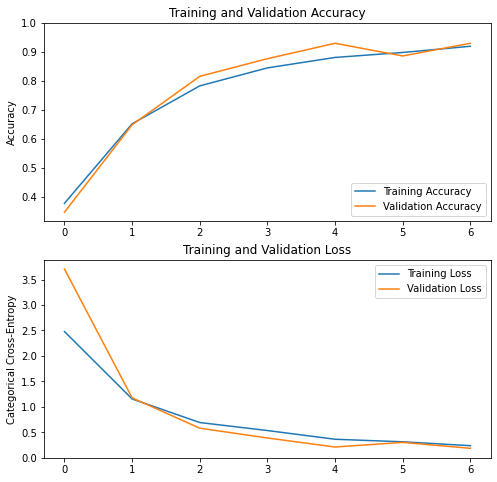

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Accuracy Graph

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# Loss Graph

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross-Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

# **Prediction Funtionality - Incomplete**

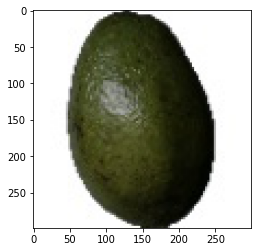

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline
import requests
from matplotlib.image import imread

#loading and preprocessing fruits
IMAGE_PATH='/content/drive/MyDrive/archive (1)/test/test/0013.jpg'
imread=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
imread=tf.keras.preprocessing.image.img_to_array(imread)

#view the image
plt.imshow(imread/255.)